In [ ]:
# !pip install scikit-learn
# !pip install pandas
# !pip install emoji
# !pip install num2words
# !pip install nltk
# !pip install matplotlib
# !pip install wordcloud

In [1]:
import json
import pandas as pd
from sklearn.model_selection import train_test_split
import re
import emoji
from num2words import num2words
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report
nltk.download('stopwords')
nltk.download('wordnet')
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from collections import Counter
from matplotlib import colors
from wordcloud import WordCloud

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [2]:
#!pip install ipynb 
from ipynb.fs.full.preprocessor_class import Preprocessor

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Stefi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [3]:
train_data = pd.read_csv('data/shuffled_train_data.csv',index_col=None)
train_labels = pd.read_csv('data/shuffled_train_labels.csv',index_col=None)

test_data = pd.read_csv('data/test_data.csv',index_col=None)
test_labels = pd.read_csv('data/test_labels.csv',index_col=None)

train_data_plot = pd.read_csv('data/train_data_plot.csv',index_col=None)
test_data_plot = pd.read_csv('data/test_data_plot.csv',index_col=None)

train_data.shape

(45000, 1)

In [4]:
preprocessor = Preprocessor(set(stopwords.words('english')), WordNetLemmatizer(), PorterStemmer(), True, True, True, True, True, False, True, True, True, False)

preprocessed_train_data = pd.DataFrame(columns=['text'])
preprocessed_test_data = pd.DataFrame(columns=['text'])

preprocessed_train_data['text'] = train_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)
preprocessed_test_data['text'] = test_data.apply(lambda row: preprocessor.preprocess(row.iloc[0]), axis = 1)


In [5]:
preprocessed_train_data.head(10)

,text
0,"[love, super, comfortable]"
1,"[shave, cremes, need, lather, feeling, fullnes..."
2,"[love, bright, color, dress, fabric, nice, fee..."
3,"[see, small, got, curve, get, fit, like, size]"
4,"[sister, love, wolf, go, wrong, cute, comfy, w..."
5,"[like, style, back]"
6,"[return, large, like, shoe, look]"
7,"[broke, hour]"
8,"[like, everybody]"
9,"[wallet, rfid, blocking, property, credit, car..."


In [6]:
preprocessed_test_data.head(10)

,text
0,"[poorly, made, shrink, fit, well]"
1,"[playing, santa, year, authentic, high, qualit..."
2,"[bought, two, one, better, shipping, schedule,..."
3,"[came, box, scratch, one, lense, know, inexpen..."
4,"[okay, kind, hard, explain, really, liked, ski..."
5,"[illustration, even, close, care, color, recei..."
6,"[size, way, regularly, wear, size, least, inch..."
7,"[chris, kyle, frog, american, sniper, legend, ..."
8,"[x, fit, small, usually, wear, x, material, th..."
9,"[ordered, watch, silver, loved, decided, order..."


In [7]:
preprocessed_train_data["text"] = preprocessed_train_data["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
print(preprocessed_train_data["text"])

preprocessed_test_data["text"] = preprocessed_test_data["text"].apply(lambda x: ",".join(x) if isinstance(x, list) else x)
print(preprocessed_test_data["text"])


0                                   love,super,comfortable
1        shave,cremes,need,lather,feeling,fullness,rich...
2        love,bright,color,dress,fabric,nice,feel,reall...
3                    see,small,got,curve,get,fit,like,size
4              sister,love,wolf,go,wrong,cute,comfy,wolfie
                               ...                        
44995    sandal,poorly,constructed,base,shoe,fitting,ex...
44996    wow,shirt,comfortable,fit,hug,body,softness,fr...
44997    problem,heel,pain,pf,looking,good,walking,shoe...
44998    keep,spotting,hand,everything,blue,ink,even,le...
44999                   light,died,right,away,poor,quality
Name: text, Length: 45000, dtype: object
0                             poorly,made,shrink,fit,well
1       playing,santa,year,authentic,high,quality,sant...
2       bought,two,one,better,shipping,schedule,second...
3       came,box,scratch,one,lense,know,inexpensive,un...
4       okay,kind,hard,explain,really,liked,skirt,know...
                    

In [8]:
#hiperparametrization

best_accuracy = 0
chosen_parameters = {}

for max_features in [3000, 5000]:

  #initiate the TfidfVectorizer
  tfidf = TfidfVectorizer(max_features=max_features)

  #convert the training and validation data to tf-idf indexes
  X_train_tfidf = tfidf.fit_transform(preprocessed_train_data["text"]).toarray()
  X_test_tfidf = tfidf.transform(preprocessed_test_data["text"]).toarray()

  for penalty in ['l2']:
    for tol in [ 5, 0.3, 3]:
      for C in [ 0.1, 0.3, 3]:

        model = LogisticRegression(penalty=penalty, tol=tol, C=C)

        model.fit(X_train_tfidf, train_labels['label'])
        predictions = model.predict(X_test_tfidf)

        score = accuracy_score(test_labels['label'],predictions)

        print('max_features: {}  penalty: {}  tol: {}  C: {}  accuracy: {}'.format(max_features, penalty, tol, C, score))

        if score > best_accuracy:
          best_accuracy = score
          chosen_parameters["max_features"] = max_features
          chosen_parameters["penalty"] = penalty
          chosen_parameters["tol"] = tol
          chosen_parameters["C"] = C

print(best_accuracy)
print(chosen_parameters)
  

max_features: 3000  penalty: l2  tol: 5  C: 0.1  accuracy: 0.691
max_features: 3000  penalty: l2  tol: 5  C: 0.3  accuracy: 0.6958333333333333


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_features: 3000  penalty: l2  tol: 5  C: 3  accuracy: 0.6936666666666667
max_features: 3000  penalty: l2  tol: 0.3  C: 0.1  accuracy: 0.6906666666666667
max_features: 3000  penalty: l2  tol: 0.3  C: 0.3  accuracy: 0.6958333333333333


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_features: 3000  penalty: l2  tol: 0.3  C: 3  accuracy: 0.6936666666666667
max_features: 3000  penalty: l2  tol: 3  C: 0.1  accuracy: 0.691
max_features: 3000  penalty: l2  tol: 3  C: 0.3  accuracy: 0.6951666666666667


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_features: 3000  penalty: l2  tol: 3  C: 3  accuracy: 0.6936666666666667
max_features: 5000  penalty: l2  tol: 5  C: 0.1  accuracy: 0.69
max_features: 5000  penalty: l2  tol: 5  C: 0.3  accuracy: 0.6958333333333333


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_features: 5000  penalty: l2  tol: 5  C: 3  accuracy: 0.6925
max_features: 5000  penalty: l2  tol: 0.3  C: 0.1  accuracy: 0.6898333333333333
max_features: 5000  penalty: l2  tol: 0.3  C: 0.3  accuracy: 0.6961666666666667


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


max_features: 5000  penalty: l2  tol: 0.3  C: 3  accuracy: 0.6925
max_features: 5000  penalty: l2  tol: 3  C: 0.1  accuracy: 0.69
max_features: 5000  penalty: l2  tol: 3  C: 0.3  accuracy: 0.6961666666666667
max_features: 5000  penalty: l2  tol: 3  C: 3  accuracy: 0.6925
0.6961666666666667
{'max_features': 5000, 'penalty': 'l2', 'tol': 0.3, 'C': 0.3}


C:\Users\Stefi\PycharmProjects\PMLKaggle\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
model = make_pipeline(TfidfVectorizer(max_features=chosen_parameters['max_features']), LogisticRegression(penalty=chosen_parameters['penalty'], tol=chosen_parameters['tol'], C=chosen_parameters['C']))

model.fit(preprocessed_train_data['text'], train_labels['label'])  

predictions = model.predict(preprocessed_test_data['text'])


In [10]:
accuracy = accuracy_score(test_labels['label'], predictions)
from sklearn.metrics import classification_report

print("Accuracy:", accuracy)
print(classification_report(test_labels['label'], predictions))

Accuracy: 0.6961666666666667
              precision    recall  f1-score   support

    negative       0.68      0.81      0.74      2250
     neutral       0.53      0.32      0.40      1500
    positive       0.77      0.83      0.80      2250

    accuracy                           0.70      6000
   macro avg       0.66      0.65      0.65      6000
weighted avg       0.68      0.70      0.68      6000


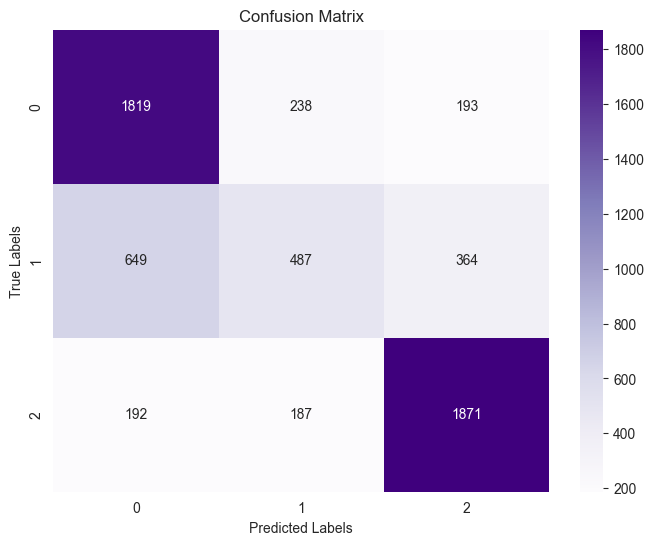

In [11]:
# !pip install seaborn
import seaborn as sns
from sklearn.metrics import confusion_matrix

conf_matrix = confusion_matrix(test_labels['label'], predictions)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Purples')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()